EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 1: Python Setup
## Due October 10, 2021 by 11:59 PM
### <span style="color: red">Xiangyu Gao</span>

Copyright &copy; 2021, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Get Jupyter running on your computer, or learn to use Google Colab's Jupyter environment.
- Make sure you can click through the Lecture 1 notes on Python. Try changing some of the cells to see the effects. 
- If you haven't done any Python, follow one of the links in Lecture 1 to a tutorial and work through it.
- If you haven't done any Numpy or Sympy, read through the linked documentation and tutorials for those too.

### 1. Complex Numbers
Write a function `rand_complex(n)` that returns a list of `n` random complex numbers uniformly distributed in the unit circle (i.e., the magnitudes of the numbers are all between 0 and 1). Give the function a docstring. Demonstrate the function by making a list of 25 complex numbers. 

In [100]:
import random
import math
import numpy as np

def rand_complex(n):
  L=[]
  for i in range(n):
    r = random.uniform(0,1)
    theta = random.uniform(0,2*math.pi)
    x = r*math.sin(theta)
    y = r*math.cos(theta)
    result=complex(x,y)
    L.append(result)
  return L

In [101]:
L=np.array(rand_complex(25))
L

array([-0.50039259+2.83504619e-01j, -0.27372334+1.22136559e-01j,
       -0.10382129-5.34933195e-01j,  0.45528935-1.19856539e-01j,
        0.40574703-4.72450178e-01j,  0.01433847-1.78303691e-02j,
        0.03554005-1.44607607e-01j,  0.42220796+6.26575596e-01j,
       -0.12916447-4.69334069e-02j,  0.42125667+1.93725143e-01j,
        0.91514711-2.85084139e-01j, -0.30035093-4.18006635e-04j,
        0.14634587-3.70416567e-01j,  0.48514614+9.77115523e-02j,
        0.5226517 -1.37320333e-01j, -0.03512019+6.03654775e-03j,
        0.2745575 +7.23735087e-01j,  0.00842996+3.53874224e-01j,
        0.00281951-6.89431758e-02j,  0.49134623-5.13201223e-01j,
       -0.40914298-2.60005207e-01j,  0.47786979+2.90580553e-01j,
       -0.66370147-3.21144777e-02j, -0.35108086+2.82471824e-01j,
       -0.20145998-1.07366217e-01j])

### 2. Hashes
Write a function `to_hash(L) `that takes a list of complex numbers `L` and returns an array of hashes of equal length, where each hash is of the form `{ "re": a, "im": b }`. Give the function a docstring and test it by converting a list of 25 numbers generated by your `rand_complex` function. 

In [102]:
def to_hash(L):
  hash_array=[]
  for i in range(len(L)):
    L_dic={}
    L_dic.setdefault('re',L[i].real)
    L_dic.setdefault('im',L[i].imag)
    hash_array.append(L_dic)
    return hash_array

In [103]:
to_hash(L)

[{'im': 0.2835046187471097, 're': -0.5003925902571618}]

### 3. Matrices

Write a function `lower_traingular(n)` that returns an $n \times n$ numpy matrix with zeros on the upper diagonal, and ones on the diagonal and lower diagonal. For example, `lower_triangular(3)` would return

```python
array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])
```

In [104]:
import numpy as np
def lower_traingular(n):
  a=np.ones(n,int)
  m=np.tril(a)
  return m

In [105]:
lower_traingular(3)

array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])

### 4. Numpy

Write a function `convolve(M,K)` that takes an $n \times m$ matrix $M$ and a $3 \times 3$ matrix $K$ (called the kernel) and returns their convolution as in [this diagram](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYo2_VuAlQhfeEGJHva3WUlnSJLeE0ApYyjw&usqp=CAU).


Please do not use any predefined convolution functions from numpy or scipy. Write your own. If the matrix $M$ is too small, your function should return a exception.

You can read more about convolution in [this post](https://setosa.io/ev/image-kernels/).

The matrix returned will have two fewer rows and two fewer columns than $M$. Test your function by making a $100 \times 100$ matrix of zeros and ones that as an image look like the letter X and convolve it with the kernel

$$
K = \frac{1}{16} \begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{pmatrix}
$$

Use `imshow` to display both images using subplots. 

In [106]:
import numpy as np

def convolve_test(M,K):

    HM, WM = M.shape
    HK, WK = K.shape
    try:
      out = np.zeros((HK, WK))
      for i in range(HK):
       for j in range(WK):
        out[i][j] = np.sum(np.multiply(K, M[i:(i+HK), j:(j+WK)]))

      return out
    except:
      return "wrong input"

In [107]:
M = np.array([[0,1,2],
        [3,4,5],
        [6,7,8]])
K1 = np.array([[0,1],
        [2,3]])
print(convolve_test(M,K1))

[[19. 25.]
 [37. 43.]]


In [108]:
import numpy as np

def convolve(M,K):

    HM, WM = M.shape
    HK, WK = K.shape
    try:
      out = np.zeros((HM-2, WM-2))
      for i in range(HM-2):
        for j in range(WM-2):
          out[i][j] = np.sum(np.multiply(K, M[i:(i+HK), j:(j+WK)]))
          hout, wout = out.shape
        return out
    except:
      return "wrong"

In [109]:
import numpy as np
test = np.zeros((100,100))
for i in range(100):
    test[i,i]=1
    test[i,99-i]=1
K=(1/16)*np.array([[1,2,1],
          [2,4,2],
          [1,2,1]])
result=convolve(test,K)
print(result)

[[0.375  0.25   0.0625 ... 0.0625 0.25   0.375 ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]


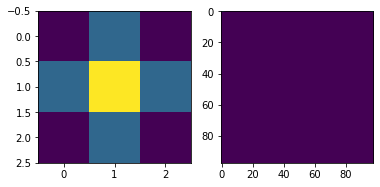

In [110]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122)
ax1.imshow(K)
ax2.imshow(result)

### 5. Symbolic Manipulation

Use sympy to specify and solve the following equations for $x$.

- $x^2 + 2x - 1 = 0$ 
- $a x^2 + bx + c = 0$

Also, evaluate the following integrals using sympy

- $\int x^2 dx$
- $\int x e^{6x} dx$
- $\int (3t+5)\cos(\frac{t}{4}) dt$

In [111]:
import sympy as sy
x,a,b,c = sy.symbols('x a b c')
print(sy.solve(x**2+2*x-1,x))
print(sy.solve(a*x**2+b*x+c,x))

[-1 + sqrt(2), -sqrt(2) - 1]
[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


In [112]:
import sympy as sy
import math
x,t = sy.symbols('x t')
f1=x**2
f2=x*math.e**(6*x)
f3=(3*t+5)* sy.cos(t/4)
print(sy.integrate(f1,x))
print(sy.integrate(f2,x))
print(sy.integrate(f3,t))

x**3/3
1.0*2.71828182845905**(6*x)*(0.166666666666667*x - 0.0277777777777778)
12*t*sin(t/4) + 20*sin(t/4) + 48*cos(t/4)


### 6. Typesetting

Use LaTeX to typeset the following equations.

<img src="https://www.sciencealert.com/images/Equations_web.jpg">


In [113]:
import sympy as sym
sym.init_printing()
sym.symbols('a^{2}+b^{2}=c^2')

In [114]:
sym.symbols('logxy=logx+logy')

In [115]:
sym.symbols('\cfrac{df}{dt}=\lim_{x→0}=\cfrac{f(t+h)-f(t)}{h}')

\cfrac{df}{dt}=\lim_{x→0}=\cfrac{f(t+h)-f(t)}{h}

In [116]:
sym.symbols('F=G\cfrac{m_1m_2}{r^2}')

F=G\cfrac{m_1m_2}{r__2}

In [117]:
sym.symbols('i^{2}=-1')

In [118]:
sym.symbols('V-E+F=2')

In [119]:
sym.symbols('\Phi(x)=\cfrac{1}{\sqrt{2\pi}{\\rho}}e^{\cfrac{(x-{\mu})^2}{2\\rho^2}}')

\Phi(x)=\cfrac{1}{\sqrt{2\pi}{\rho}}e__{\cfrac{(x-{\mu})__2}{2\rho__2}}

In [120]:
sym.symbols('\cfrac{\partial^{2}u}{\partial{t^2}}=c^2\cfrac{\partial^{2}u}{\partial{x^2}}')

\cfrac{\partial__{2}u}{\partial{t__2}}=c__2\cfrac{\partial__{2}u}{\partial{x__
2}}

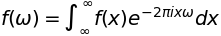

In [121]:
sym.symbols('f(\omega)={\int_\infty^\infty}f(x)e^{-2{\pi}ix{\omega}}dx')

In [122]:
sym.symbols('\\rho(\cfrac{\partial{v}}{\partial{t}}+v\cdot\\nabla{v})=-\\nabla{p}+\\nabla\cdot{T}+f')

\rho(\cfrac{\partial{v}}{\partial{t}}+v\cdot\nabla{v})=-\nabla{p}+\nabla\cdot{
T}+f

In [123]:
sym.symbols('\\nabla\cdot{E}=0\qquad\\nabla\cdot{H}=0')

In [124]:
sym.symbols('\\nabla\\times{E}=-\cfrac{1}{c}\cfrac{\partial{H}}{\partial{t}}\qquad\\nabla\\times{H}=\cfrac{1}{c}\cfrac{\partial{E}}{\partial{t}}')

\nabla\times{E}=-\cfrac{1}{c}\cfrac{\partial{H}}{\partial{t}}\qquad\nabla\time
s{H}=\cfrac{1}{c}\cfrac{\partial{E}}{\partial{t}}

In [125]:
sym.symbols('dS\geq0')

In [126]:
sym.symbols('E=mc^2')

In [127]:
sym.symbols('ih\cfrac{\partial}{\partial{t}}\Psi=H\Psi')

ih\cfrac{\partial}{\partial{t}}\Psi=H\Psi

In [128]:
sym.symbols('H=-\sum{p(x)\log{p(x)}}')

In [129]:
sym.symbols('x_{t+1}=kx_{t}(1-x_t)')

In [130]:
sym.symbols('{\\frac12}\sigma^{2}S^{2}\cfrac{\partial^{2}V}{\partial{S^2}}+rS\cfrac{\partial{V}}{\partial{S}}+\cfrac{\partial{V}}{\partial{S}}+\cfrac{\partial{V}}{\partial{t}}-rV=0')

{\frac12}\sigma__{2}S__{2}\cfrac{\partial__{2}V}{\partial{S__2}}+rS\cfrac{\par
tial{V}}{\partial{S}}+\cfrac{\partial{V}}{\partial{S}}+\cfrac{\partial{V}}{\pa
rtial{t}}-rV=0